# Introduction
`Data`
- Dataset Created by Jose Portilla and Pierian Data for his Udemy Course (Python for Data Science and Machine Learning Bootcamp) 

`Goal`
- Based on the customer behavior data to predict who is more likely to click the ad!

`Feature	Description`
1. Daily Time Spent on a Site -- Time spent by the user on a site in minutes.
2. Age -- Customer's age in terms of years.
3. Area Income -- Average income of geographical area of consumer.
4. Daily Internet Usage -- 	Avgerage minutes in a day consumer is on the internet.
5. Ad Topic Line -- Headline of the advertisement.
6. City	 -- City of the consumer.
7. Male -- 	Whether or not a consumer was male.
8. Country -- Country of the consumer.
9. Timestamp -- Time at which user clicked on an Ad or the closed window.
10. Clicked on Ad -- 0 or 1 is indicated clicking on an Ad.

# Import libraries

In [2]:
# Import packages we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# load the data 

In [3]:
df=pd.read_csv('advertising.csv')
df.head() 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.shape # check the shape

(1000, 10)

In [5]:
# check if there are some missing values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
# take look at the last column
target=df['Clicked on Ad']
df['Clicked on Ad'].value_counts()


1    500
0    500
Name: Clicked on Ad, dtype: int64

The data contians 10 columns and last columns shows there are two different classes - if people clicked the ads it shows 1 else it shows 0, and we also can observe that the numner of people in different those two classes are even so we do not need to applied oversample method to make two classes' size even. 

# EDA & Data Engieering

## Distribution

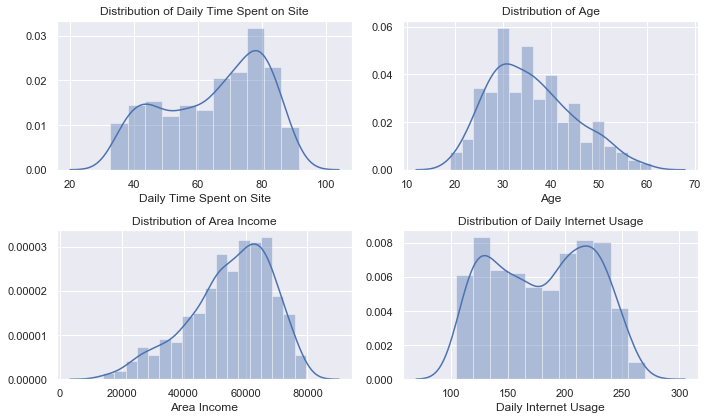

In [7]:
# check the distributions for numerical data
plt.figure(figsize=(10,6))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.distplot(df[df.columns[i]])
    plt.title("Distribution of {}".format(df.columns[i]))
plt.tight_layout()
# we can see that the distribution is a little bit right skewed.
# and most customers are around 30 years old 

In [8]:
# statistical Desription
df[df.columns[:4]].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


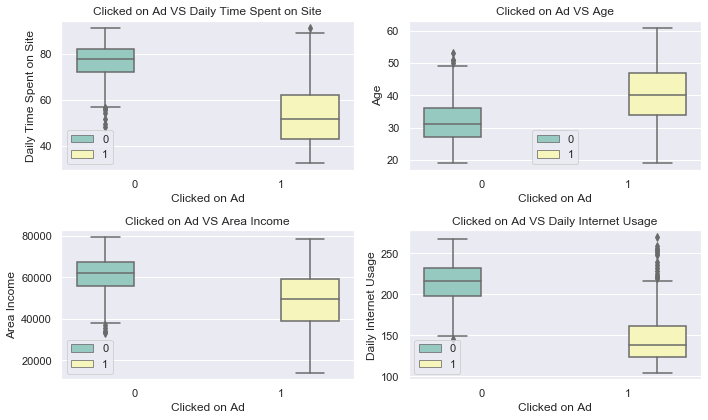

In [9]:
# numerical data vs target
plt.figure(figsize=(10,6))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x="Clicked on Ad",y=df.columns[i],
                hue="Clicked on Ad",data=df, palette="Set3")
    plt.title("Clicked on Ad VS {}".format(df.columns[i]))
    plt.legend(loc='best')
plt.tight_layout()

## Headline of the advertisement

### Find out the which singel words has high frequency in different classes

In [10]:
df['Ad Topic Line'][:8] 
# take look at first 8 elements and we can see there are "-" punctuation included

0       Cloned 5thgeneration orchestration
1       Monitored national standardization
2         Organic bottom-line service-desk
3    Triple-buffered reciprocal time-frame
4            Robust logistical utilization
5          Sharable client-driven software
6               Enhanced dedicated support
7                 Reactive local challenge
Name: Ad Topic Line, dtype: object

In [11]:
len(df['Ad Topic Line'].value_counts()) 
# we can see those headlines are unique 
# however I want to know if some keywords will affect people decisions
# to click the ads or not 

1000

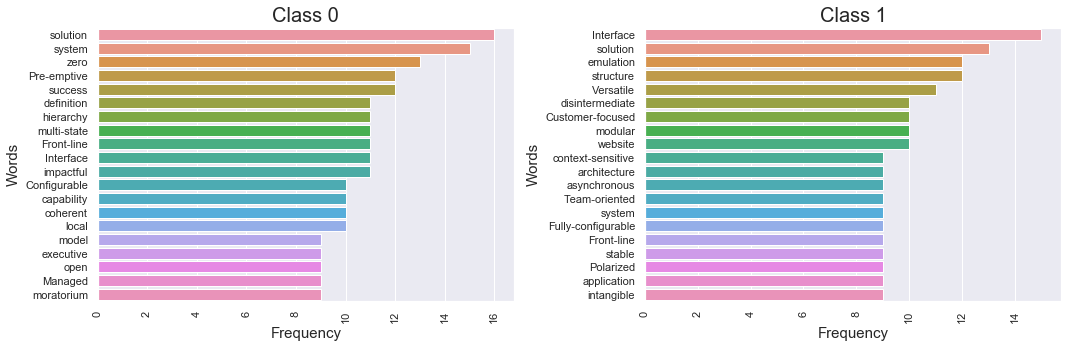

In [12]:
from itertools import chain
#pd.DataFrame(pd.Series(chain(*goodreviews)).value_counts())
class0=pd.DataFrame(pd.Series(list(chain(*[i.split(" ") for i in df[df['Clicked on Ad']==0]['Ad Topic Line']]))).value_counts()).sort_values(by=0,ascending=False).reset_index()
class1=pd.DataFrame(pd.Series(list(chain(*[i.split(" ") for i in df[df['Clicked on Ad']==1]['Ad Topic Line']]))).value_counts()).sort_values(by=0,ascending=False).reset_index()
# Most common words
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(class0[0][:20],class0['index'][:20])
plt.xticks(rotation=90)
plt.title('Class 0',fontsize=20)
plt.ylabel('Words',fontsize=15)
plt.xlabel('Frequency',fontsize=15)

plt.subplot(1,2,2)
sns.barplot(class1[0][:20],class1['index'][:20])
plt.xticks(rotation=90)
plt.title('Class 1',fontsize=20)
plt.ylabel('Words',fontsize=15)
plt.xlabel('Frequency',fontsize=15)
plt.tight_layout()

plt.show()

### Bigram

In [13]:
# import nlp related packages
import re, string
from nltk.corpus import stopwords
import nltk

In [14]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation) 
sw_set = set(sw_list)

# tokenization
def process_review(review):
    tokens = nltk.word_tokenize(review) # tokenization
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]# stop workds removal
    return stopwords_removed

# obtian cleaned text data 
def data_preprocessing(review):
    processed_review=list(map(process_review,review))
    return processed_review

In [15]:
# apply all the function above to obtianed the cleaned text data
cleaned_text=data_preprocessing(df['Ad Topic Line'])
cleaned_text[:10]

[['cloned', '5thgeneration', 'orchestration'],
 ['monitored', 'national', 'standardization'],
 ['organic', 'bottom-line', 'service-desk'],
 ['triple-buffered', 'reciprocal', 'time-frame'],
 ['robust', 'logistical', 'utilization'],
 ['sharable', 'client-driven', 'software'],
 ['enhanced', 'dedicated', 'support'],
 ['reactive', 'local', 'challenge'],
 ['configurable', 'coherent', 'function'],
 ['mandatory', 'homogeneous', 'architecture']]

In [16]:
# cleaned_text is a kind of lists-in-a-list, so let us join each list in cleaned text
df["cleaned_text"]=[" ".join(i) for i in cleaned_text]

In [17]:
# function for ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#source:https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [18]:
# Apply the function above for each class to get bigram
class0_bigram= get_top_n_bigram(df[df['Clicked on Ad']==0]['cleaned_text'], 30)
class1_bigram= get_top_n_bigram(df[df['Clicked on Ad']==1]['cleaned_text'], 30)


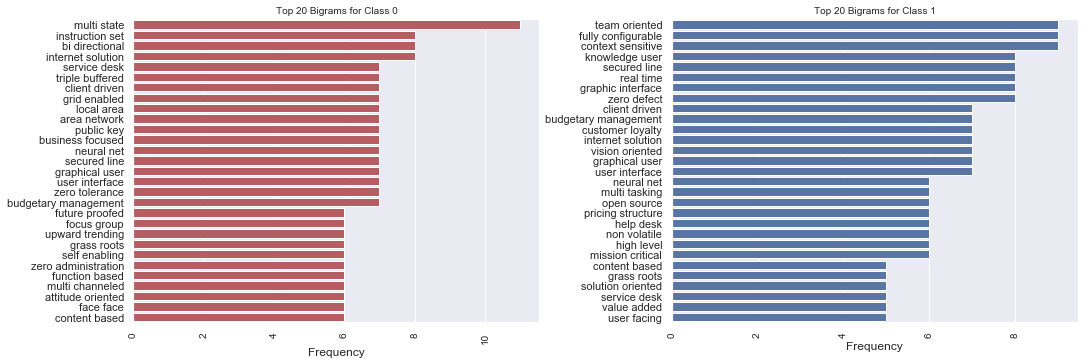

In [19]:
classes_data=[class0_bigram[1:],class1_bigram[1:]]
colors=['r','b']
plt.figure(figsize=(15,5))
for i in range(len(classes_data)):
    plt.subplot(1,2,i+1)
    x=[x[0] for x in classes_data[i]]
    y=[x[1] for x in  classes_data[i]]
    sns.barplot(y,x,color=colors[i])
    plt.xticks(rotation=90,fontsize=10)
    plt.xlabel("Frequency")
    plt.title("Top 20 Bigrams for Class {}".format(i),fontsize=10)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Word Cloud

In [20]:
# wordcloud function
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

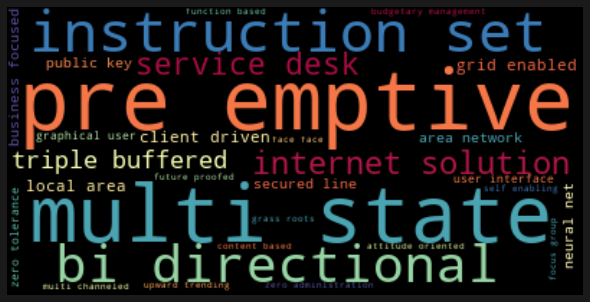

In [21]:
# create dictionary for class 0 and 1 
text_dictionary0={}
text_dictionary1={}
for i in range(len(class0_bigram)):
    text_dictionary0[class0_bigram[i][0]]=class0_bigram[i][1]
    text_dictionary1[class1_bigram[i][0]]=class0_bigram[i][1]

# Create the word cloud of the text data - class 0

wordcloud0 = WordCloud(colormap='Spectral').generate_from_frequencies(text_dictionary0)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

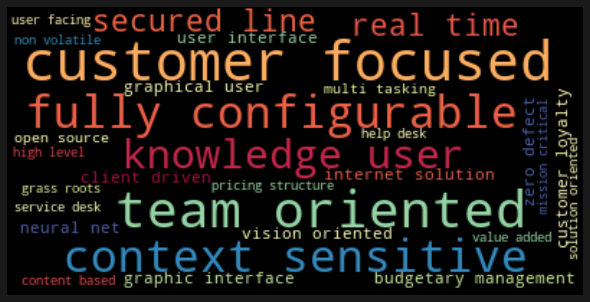

In [22]:
# Create the word cloud of the text data - class 1
wordcloud1 = WordCloud(colormap='Spectral').generate_from_frequencies(text_dictionary1)
plt.figure(figsize=(8,10), facecolor='k')
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## 'City' & " Country"

In [23]:
df['City'].value_counts()[:10] 

Lisamouth          3
Williamsport       3
Joneston           2
Shelbyport         2
East Timothy       2
Lake Patrick       2
New Sheila         2
Michelleside       2
Wrightburgh        2
Benjaminchester    2
Name: City, dtype: int64

In [24]:
df['Country'].value_counts()[:10]

Czech Republic    9
France            9
Micronesia        8
Cyprus            8
South Africa      8
Senegal           8
Peru              8
Turkey            8
Liberia           8
Australia         8
Name: Country, dtype: int64

The highest frequencies of city and country are 3 and 9 which cannot provide informative content. 

In [25]:
# encode the city and country columns
# create a function to transform the data 
from sklearn import  preprocessing
def encode(data):
    le = preprocessing.LabelEncoder()
    le.fit(data)
    return le.transform(data)

df['Country']=encode(df['Country'])
df['City']=encode(df['City'])

In [26]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,cleaned_text
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,961,0,215,2016-03-27 00:53:11,0,cloned 5thgeneration orchestration
1,80.23,31,68441.85,193.77,Monitored national standardization,903,1,147,2016-04-04 01:39:02,0,monitored national standardization
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,111,0,184,2016-03-13 20:35:42,0,organic bottom-line service-desk
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,939,1,103,2016-01-10 02:31:19,0,triple-buffered reciprocal time-frame
4,68.37,35,73889.99,225.58,Robust logistical utilization,805,0,96,2016-06-03 03:36:18,0,robust logistical utilization


## Timestamp

In [27]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month 
df['Day'] = df['Timestamp'].dt.day     
df['Hour'] = df['Timestamp'].dt.hour   
df["Weekday"] = df['Timestamp'].dt.dayofweek 

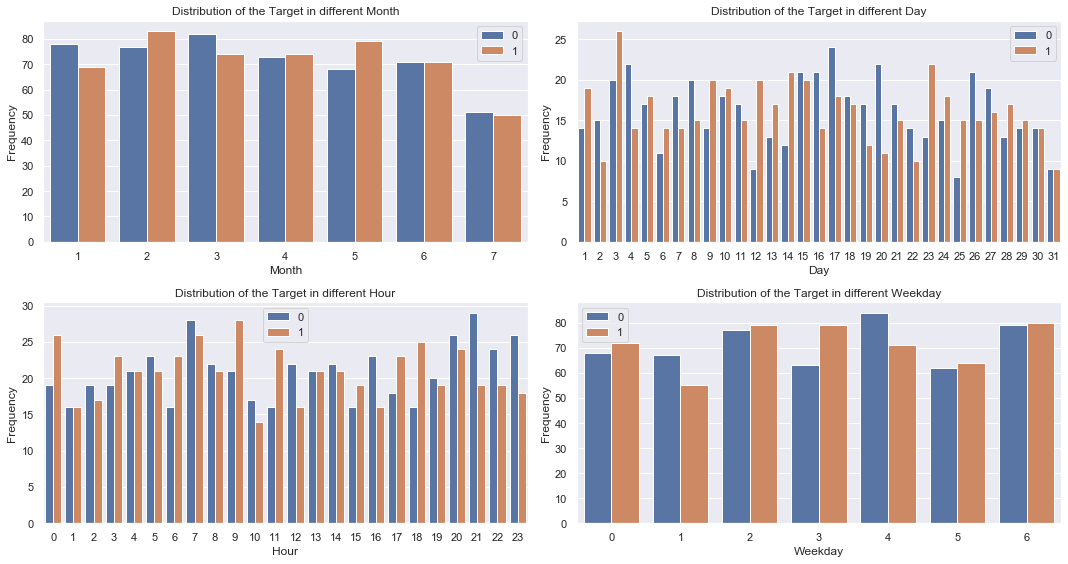

In [28]:
# plot advanced bar charts for different time columns
time_columns=['Month',"Day","Hour","Weekday"]
plt.figure(figsize=(15,8))
for i in range(len(time_columns)):
    plt.subplot(2,2,i+1)
    data=pd.DataFrame(df.groupby(time_columns[i])["Clicked on Ad"].value_counts())
    data.columns=["counts"]
    data=data.reset_index()
    sns.barplot(x=time_columns[i],
                y="counts",
                hue=data["Clicked on Ad"],
                data=data,ci=None)
#    sns.lineplot(data[time_columns[i]],data[data["Clicked on Ad"]==1]["counts"],color='r')
    plt.title("Distribution of the Target in different {}".format(time_columns[i]))
    plt.ylabel("Frequency")
    plt.legend(loc="best")
plt.tight_layout()
plt.show() 

## Age VS Hour & Weekday

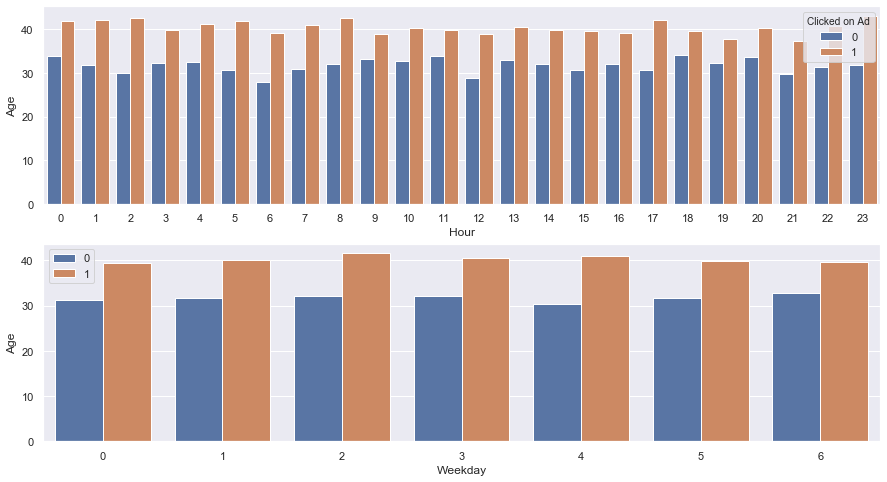

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.barplot(x="Hour",y="Age",hue="Clicked on Ad",data=df,ci=None)
plt.subplot(2,1,2)
sns.barplot(x="Weekday",y="Age",hue="Clicked on Ad",data=df,ci=None)
plt.legend(loc='best')
plt.show()

# Gender

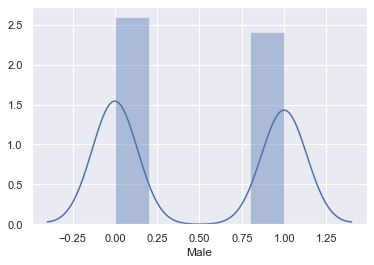

In [358]:
# distribution of gender columns
sns.distplot(df.Male)
plt.title('Distribution of Gender Columns') 
# seems that the number of each gender are almost even 

# Hour/Weekday, Target and Gender

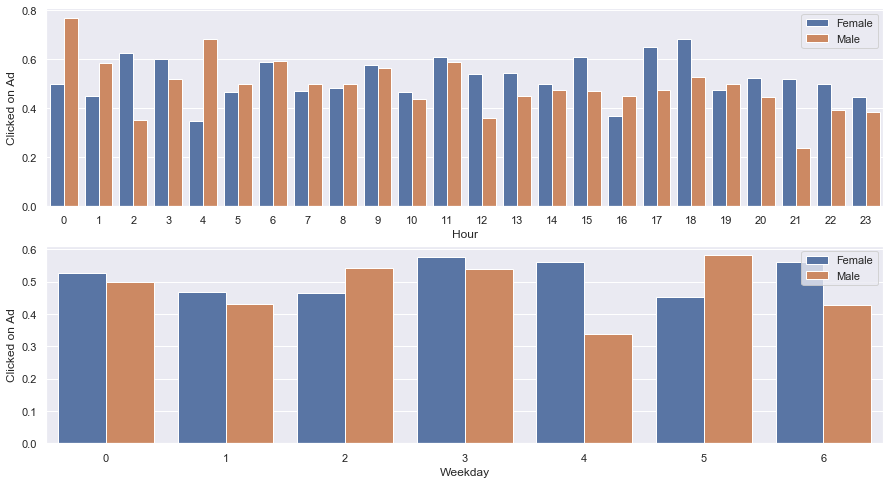

In [593]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.barplot(x='Hour',y='Clicked on Ad',hue="Male",data=df,ci=None)
plt.legend(('Female','Male'),loc='best')
plt.subplot(2,1,2)
sns.barplot(x='Weekday',y='Clicked on Ad',hue="Male",data=df,ci=None)
plt.legend(('Female','Male'),loc='best')
plt.show()

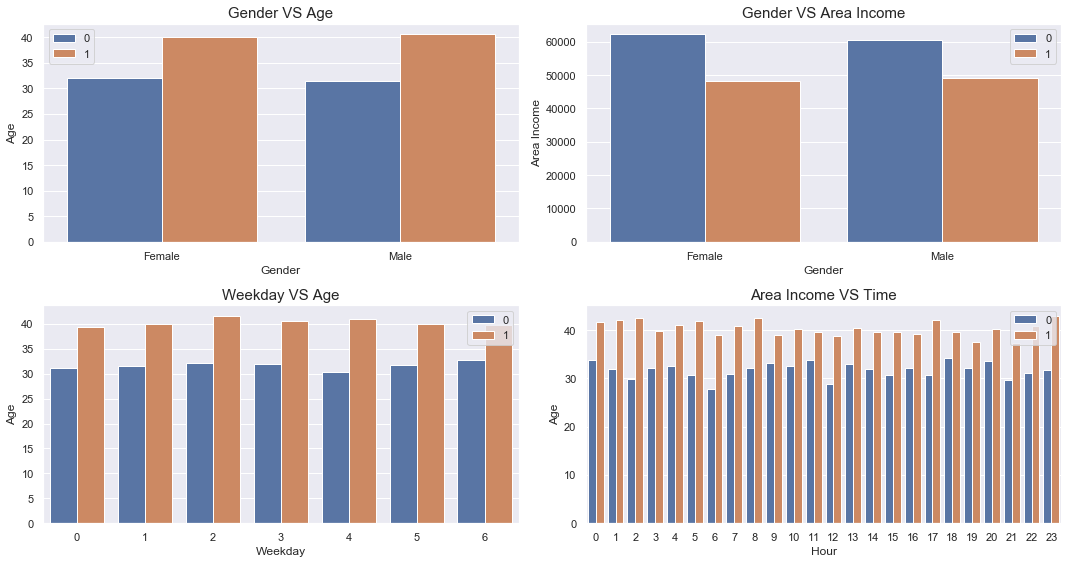

In [629]:
plt.figure(figsize=(15,8))

# Gender,Age and Target
plt.subplot(2,2,1)
sns.barplot(x='Male',y='Age',hue='Clicked on Ad',data=df,ci=None)
plt.title("Gender VS Age",fontsize=15)
plt.xticks([0,1],["Female","Male"])
plt.xlabel("Gender")
plt.legend(loc='best')

# Gender,income and Target
plt.subplot(2,2,2)
sns.barplot(x='Male',y="Area Income",hue='Clicked on Ad',data=df,ci=None)
plt.title("Gender VS Area Income",fontsize=15)
plt.xticks([0,1],["Female","Male"])
plt.xlabel("Gender")
plt.legend(loc='best')

# Age,Weekday and Target
plt.subplot(2,2,3)
sns.barplot(x='Weekday',y='Age',hue="Clicked on Ad",data=df,ci=None)
plt.title("Weekday VS Age",fontsize=15)
plt.legend(loc='best')

# Area Income,Hour and Target
plt.subplot(2,2,4)
sns.barplot(x='Hour',y='Age',hue="Clicked on Ad",data=df,ci=None)
plt.title("Area Income VS Time",fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 1.female and male in different classes have similary estimate of central tendency for age.
#   customers aged around 30 are not likely to click ads for female and male groups
#   customer aged round 40 are more likely to click ads for female and male groups

# 2.we can see customers whose area income higher are not likely 
#   to click ads and vise versa for both female and male cutomers

# 3. From Monday to Sunday
#    customers aged around 30 are not likely to click ads for female and male groups 
#    customer aged round 40 are more likely to click ads for female and male groups
 
# 4.In 24 hours 
#    customers aged around 30 are not likely to click ads for female and male groups 
#    customer aged round 40 are more likely to click ads for female and male groups

# The Relationships between features

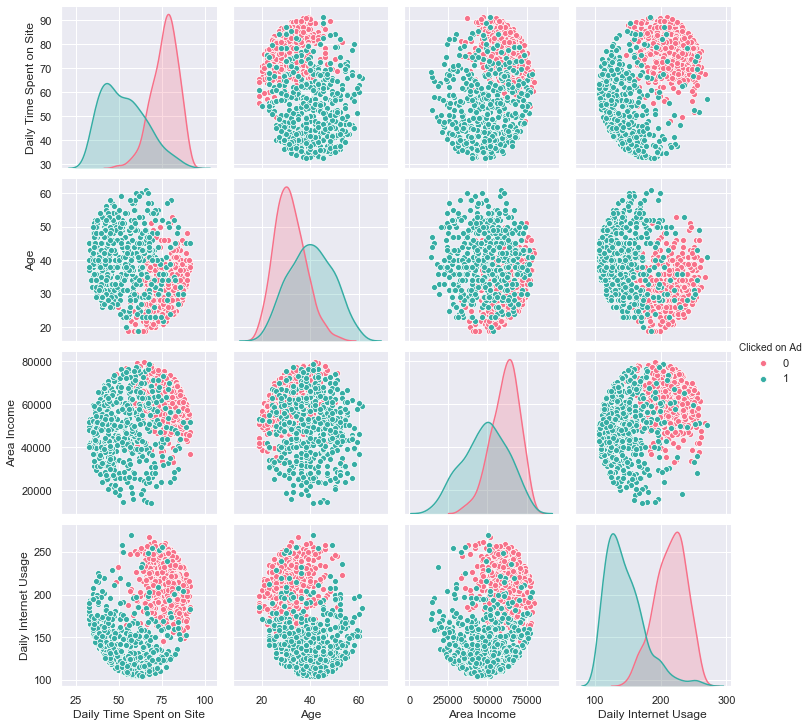

In [630]:
## Age VS Daily Time Spent on Site
sns.pairplot(df, hue = 'Clicked on Ad', 
             vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
             , palette = 'husl')
#code from :https://www.kaggle.com/konchada/logistic-vs-random-forest-model-for-ad-click


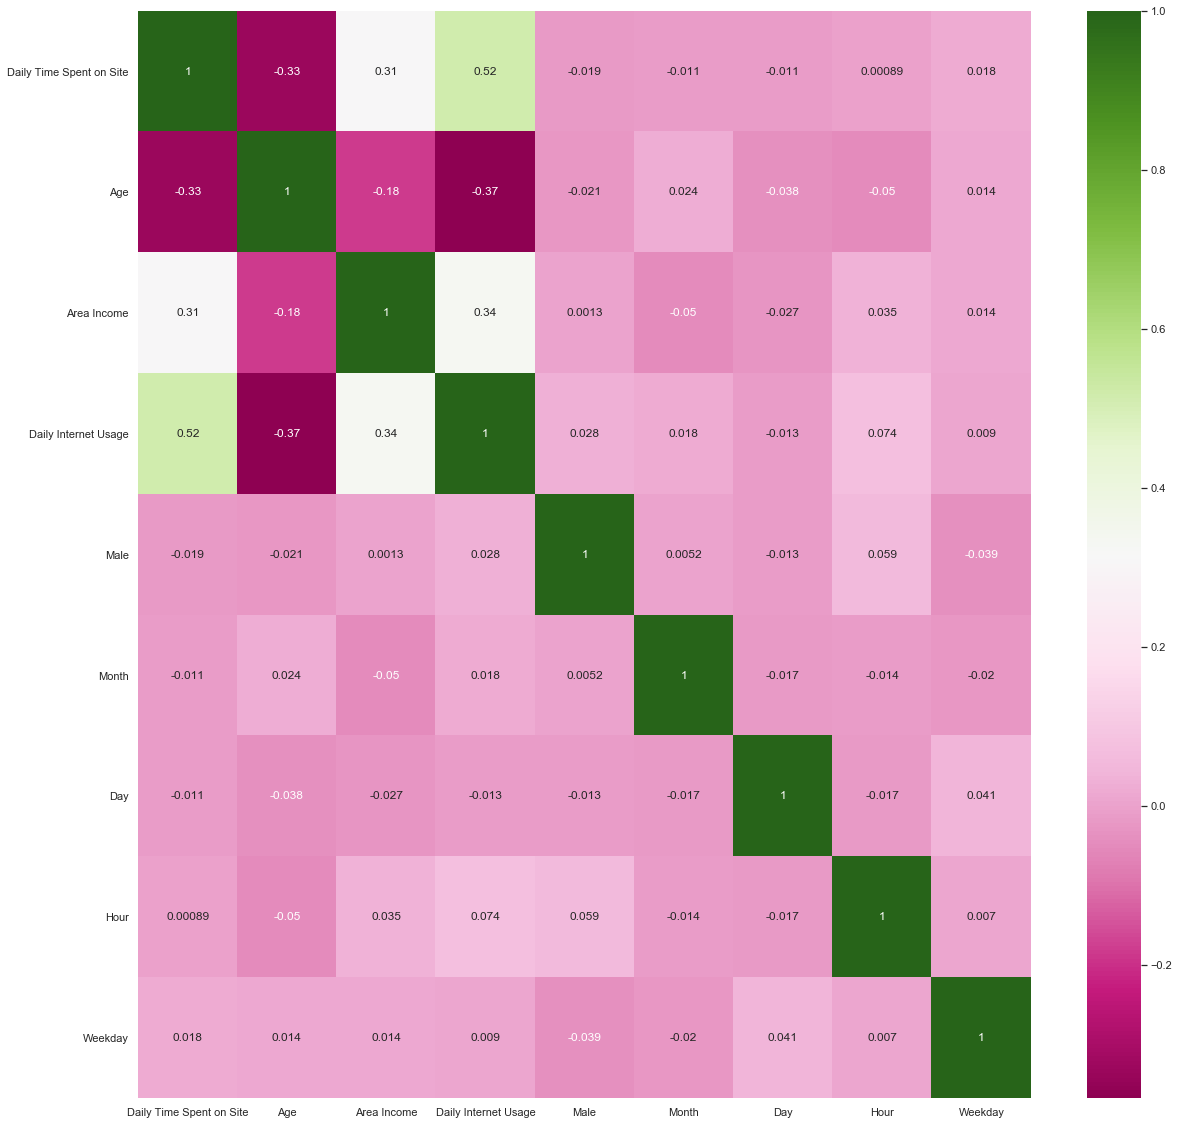

In [392]:
# Feature correlaiton heatmap
feature=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage',  'Male',
         'Month', 'Day', 'Hour','Weekday' ]]

plt.figure(figsize=(20,20))
sns.heatmap(feature.corr(), annot=True,cmap="PiYG")
plt.show()
# seems that there is no any strong correlationships between those features.

we can see:
- Age and Daily Internet Usage  negatively affect each other 
- Age and Daily Time Spent on Site  negatively affect each other 
- Daily Time Spent on Site and Daily Internet Usage positvely  affect each other

# Data Pre-processing

In [541]:
#declare target and inputs
inputs=df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country',
       'Month', 'Day', 'Hour',
       'Weekday']]
target=df['Clicked on Ad']

In [542]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=520) 
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(800, 11) (800,)
(200, 11) (200,)


# Random Forest 

In [547]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score,accuracy_score,roc_auc_score


# given prameters different values
random_grid={
             'n_estimators':list(range(100,300)),
#              'max_depth':list(range(1,30,2)),
#               'max_features':list(range(0,len(inputs.columns))),
#              'min_samples_leaf':list(range(1,50,2)),
#               'min_samples_split':list(range(2,50,2))                
             }
# random forest model
rf=RandomForestClassifier(n_jobs=-1,  random_state=0)

In [461]:
# randommized searchCV
RS=RandomizedSearchCV(rf,random_grid,cv=5,scoring="f1")

In [462]:
# fit the train data
RS.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [463]:
# obtian best parameters best score
RS.best_score_,RS.best_params_

(0.960304927462499, {'n_estimators': 240})

In [464]:
# use the best params
rfc=RandomForestClassifier(n_estimators=RS.best_params_['n_estimators'],
#                            min_samples_split=RS.best_params_['min_samples_split'], 
#                            min_samples_leaf=RS.best_params_['min_samples_leaf'],
#                            max_features=RS.best_params_['max_features'],
#                            max_depth=RS.best_params_['max_depth'],
                           n_jobs=-1,  random_state=0)

In [465]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=240,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [466]:
# Score for train and test data 
print("Score of train data :" ,rfc.score(x_train,y_train))
print("Score of test data :" ,rfc.score(x_test,y_test))

Score of train data : 1.0
Score of test data : 0.97


In [467]:
# obtian the preditions
x_train_pre=rfc.predict(x_train)
x_test_pre=rfc.predict(x_test)

In [468]:
# take look at the F1 score
f1_score_train=f1_score(y_train,x_train_pre)
f1_score_test=f1_score(y_test,x_test_pre)
print("F1 Score of train data :" , f1_score_train)
print("F1 Score of test data :" ,f1_score_test)

F1 Score of train data : 1.0
F1 Score of test data : 0.9716981132075472


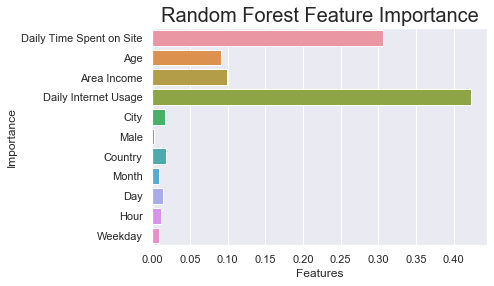

In [553]:
sns.barplot(rfc.feature_importances_,x_train.columns)
plt.title('Random Forest Feature Importance',fontsize=20)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
# of course the daily internet usage is very important
# Daily spent on Site  is also important for example: the longer a person stays on a site 
# the longer the person can be affected by the ads and the person will be attracted by the ads
# easily.

In [544]:
import itertools

def plot_confusion_matrix(cm, classes,

                        normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[ 91   3]
 [  3 103]]


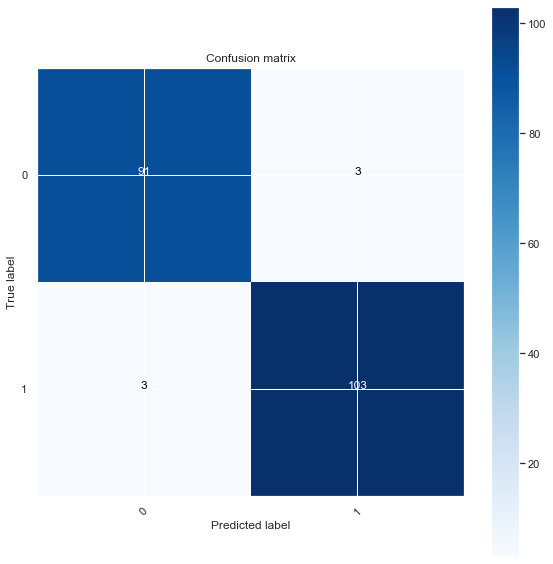

In [545]:
classes=[0,1]
plt.figure(figsize=(8,8))
plot_confusion_matrix(confusion_matrix(y_test,x_test_pre), classes,
                          normalize=False,
                          title='Confusion matrix'
                         )
plt.show()

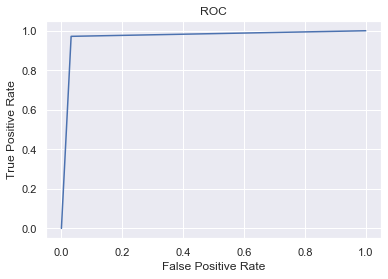

In [633]:
# Plot Random Forest ROC
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test,x_test_pre)
rf_roc_auc = roc_auc_score(y_test, x_test_pre)
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()